In [1]:
import pandas as pd
import numpy as np

# Random seed for reproducibility
np.random.seed(42)

# Synthetic dataset
# Features: word_count, special_characters, capital_use, sender's domain reputation
# Label: 0 for 'Ham', 1 for 'Spam'
data = {
    'word_count': np.random.poisson(100, 1000),
    'special_characters': np.random.binomial(10, 0.5, 1000),
    'capital_use': np.random.binomial(15, 0.3, 1000),
    'domain_reputation': np.random.uniform(0, 1, 1000),
    'is_spam': np.random.choice([0, 1], 1000, p=[0.7, 0.3])
}

df = pd.DataFrame(data)

# Save to CSV (optional)
df.to_csv('email_spam_data.csv', index=False)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load data
df = pd.read_csv('email_spam_data.csv')

# Define features and target
X = df.drop('is_spam', axis=1)
y = df['is_spam']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85       222
           1       0.00      0.00      0.00        78

    accuracy                           0.74       300
   macro avg       0.37      0.50      0.43       300
weighted avg       0.55      0.74      0.63       300

Confusion Matrix:
 [[222   0]
 [ 78   0]]


C:\Users\badgh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\badgh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\badgh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


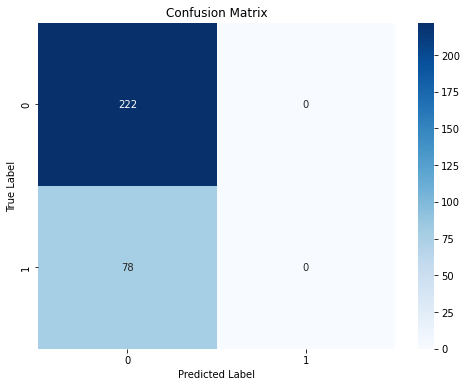

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined from your model's predictions

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


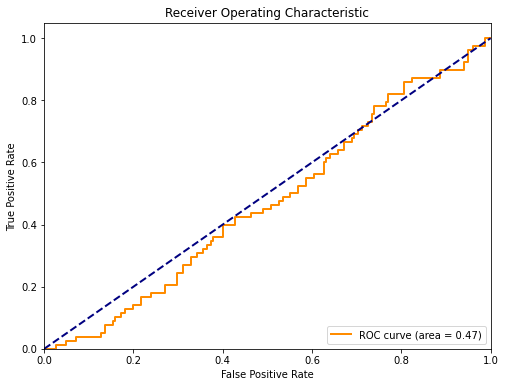

In [4]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


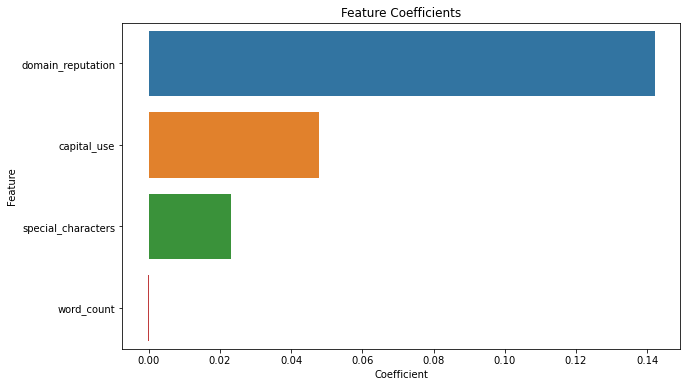

In [5]:
# Get the model's coefficients
coefficients = log_reg.coef_[0]
features = X_train.columns

# Create a DataFrame of coefficients and features
coef_df = pd.DataFrame(list(zip(features, coefficients)), columns=['Feature', 'Coefficient'])

# Sorting the DataFrame by coefficient values
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Coefficients')
plt.show()


In [16]:
# New email sample data
new_email_data = {
    'word_count': [10000],            # Number of words in the email
    'special_characters': [6],      # Count of special characters
    'capital_use': [50],             # Number of words written in all caps
    'domain_reputation': [0.55]     # Reputation score of the sender (0 to 1)
}

# Convert to DataFrame
new_sample = pd.DataFrame(new_email_data)

# Assuming 'log_reg' is your trained Logistic Regression model
new_pred = log_reg.predict(new_sample)

# Output
if new_pred[0] == 1:
    print("The email is predicted to be spam.")
else:
    print("The email is predicted to be not spam.")


The email is predicted to be not spam.
